### Importing Necessary Libraries

In [13]:
import numpy as np
import pandas as pd
from scipy.stats import trim_mean
from statsmodels import robust
import matplotlib

In [2]:
state = pd.read_csv('data/state.csv')
state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


<b>state.csv</b> represents murder rate across different US states.

### Exploratory Data Analysis

#### Location Estimates of Population and Murder Rates

In [9]:
state['Population'].mean()

np.float64(6162876.3)

In [ ]:
trim_mean(state['Population'],0.1) #Removing 10% from upper and lower half

np.float64(4783697.125)

- As expected standard mean can be sensitive to outliers.
- An average of 4 lakh population is there across different states in US.

In [4]:
np.mean(state['Murder.Rate'])

np.float64(4.066)

In [13]:
np.average(state['Murder.Rate'], weights=state['Population'])

np.float64(4.445833981123393)

- We use weighted mean in this case since population is different across different states which would indirectly affect the Murder rate.States with higher number of population should have a greater say when we want to calculate average murder rate.

### Variability Estimates Of State Population

In [8]:
print(f'Standard Deviation is {state['Population'].std()}')

print(f'InterQuantile range is  {state['Population'].quantile(0.75)- state['Population'].quantile(0.25)}')

print(f'Median Absolute Deviation {robust.scale.mad(state['Population'])}')

Standard Deviation is 6848235.347401142
InterQuantile range is  4847308.0
Median Absolute Deviation 3849876.1459979336


- As expected Standard deviation would be sensitive to outliers. 
- Median absolute deviation provides a better picture here as it is not sensitive to outliers.

#### Percentiles of murder rate by state

Text(0, 0.5, 'Population (millions)')

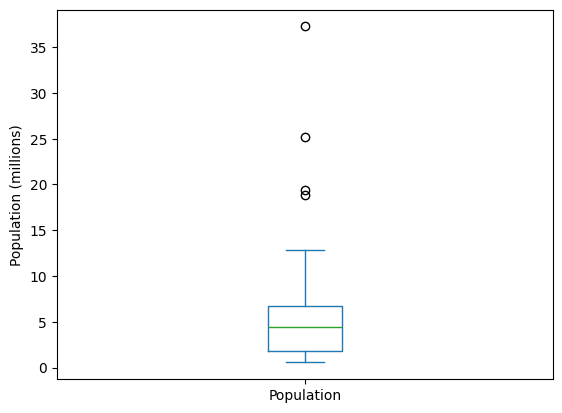

In [18]:
ax = (state['Population']/1000000).plot.box()
ax.set_ylabel('Population (millions)')

- Median state population is about 5 million.
- Almost 75% of state population is below 6 million.
- There seem to be some outliers as indicate by circles in above box plot.
